# Milestone 4

**Sara Elkilany, Eyad Elsafoury, Aoi Otani, and Yesake Teshale**<br/>
**Fall 2023**<br/>
**Gun Violence in the US** <br/>
<hr style='height:2px'>

In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css").text
HTML(styles)

<a id="contents"></a>

## Notebook contents

- [**Problem Statement**](#part1)
  - [Motivation](#part1.1)
  - [Objective](#part1.2)
  - [EDA](#part1.3)
      
- [**Model Implementation**](#part2)
  - [Data Preparation](#part2-preparation)
    - [Addressing Missingness in the Dataset](#part2-missing)
    - [Data Overview](#part2-overview)
  - [Decision Tree](#part2-1)
  - [Bagging](#part2-2)
  - [Random Forest](#part2-3)
  - [Final Model](#part2-final)


<a id="part1"></a>
    
# Problem Statement

<a id="part1.1"></a>
## Motivation 

Gun violence remains a pressing issue in the United States, with a significant impact on public safety, health, and community well-being. Every year, thousands of individuals fall victim to gun-related incidents, ranging from mass shootings to individual crimes. This epidemic of violence not only leads to loss of life but also instills fear and long-term trauma in communities. Some of our group members have experienced this impact firsthand, living in cities with high rates of gun violence and having suffered personal losses due to such incidents. This personal connection to the issue deepens our commitment to finding solutions.

Understanding the patterns and predictors of such incidents can play a crucial role in prevention and response strategies. Data science offers a unique opportunity in this context, enabling the analysis of extensive datasets to uncover crucial insights into the nature of gun violence. By exploring data on past incidents, we can identify patterns and trends that might otherwise remain obscured, offering a new perspective on a problem that continues to challenge policymakers, law enforcement agencies, and communities.

The challenge in addressing gun violence lies not only in the sheer volume of incidents but also in the complexity and variability of each case. Factors such as the perpetrator's age and gender, the nature of the crime, and the context of the incident all play critical roles. Traditional analytical methods may fall short in capturing the nuanced interplay of these variables. Thus, there's a pressing need for innovative approaches that can analyze large datasets, identify patterns, and provide actionable insights. This is where machine learning models come into play, offering the ability to process and analyze data at a scale and depth that is beyond human capacity.

<a id="part1.2"></a>
## Objective

The overarching goal of this project is to develop a sophisticated machine learning model that accurately classifies the age group of perpetrators in gun violence incidents, utilizing a dataset encompassing various incident attributes. 

To achieve this, we will employ advanced predictive analytics techniques, focusing on classification algorithms known for their efficacy in handling multi-dimensional data. Our approach includes the preprocessing of the dataset for feature selection and engineering, ensuring that only the most relevant and influential predictors are utilized in the model. We will leverage algorithms such as Decision Trees, Random Forest and Bagging Classifiers, recognized for their robustness in handling imbalanced datasets and their capacity for feature importance evaluation. These models will be rigorously trained, validated, and tested using a split of the dataset to ensure accuracy and generalizability. 

The effectiveness of the model will be assessed based on accuracy metrics, which are critical for evaluating classification models. By integrating these data science methodologies, the project aims to provide a nuanced understanding of perpetrator age group in gun violence incidents across the United States, offering valuable insights for strategic decision-making in law enforcement and public safety initiatives.

<a id="part1.3"></a>
## EDA

We will begin the project by cleaning and exploring our data.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import helper
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# Import data and take a look, taking note of the columns
df = pd.read_csv("data.csv")
data = df.copy()
display(data.head())

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,state_house_district,state_senate_district,arrested_count,Subject-Suspect_age,Victim_average_age,Subject-Suspect_gender,Age_Group_in_10s,Subject-Suspect_gender_binary,year,month
0,280,92383,2014-01-01,New York,Queens,1,0,5.0,NaN,NaN,...,33.0,14.0,1,26.0,22.0,Male,20-30,1,2014,1
1,283,92272,2014-01-01,Georgia,Columbus,0,1,2.0,NaN,NaN,...,135.0,15.0,1,25.0,27.0,Male,20-30,1,2014,1
2,286,92218,2014-01-01,Georgia,Bibb County,0,1,2.0,NaN,NaN,...,142.0,26.0,1,35.0,24.0,Male,30-40,1,2014,1
3,287,104905,2014-01-01,Virginia,Prince William County,0,1,1.0,NaN,NaN,...,50.0,29.0,1,25.0,31.0,Male,20-30,1,2014,1
4,289,94154,2014-01-01,Virginia,Hampton,0,0,3.0,NaN,NaN,...,92.0,2.0,1,19.0,19.0,Male,10-20,1,2014,1


**Variable Descriptions:**

- **incident_id:** (int64) Dataset ID
- **date:** (object) Date of the incident
- **state:** (object) State where the incident occurred
- **city_or_county:** (object) City or county where the incident occurred
- **n_killed:** (int64) Number of people killed in the incident
- **n_injured:** (int64) Number of people injured in the incident
- **congressional_district:** (float64) Congressional district of the incident location
- **gun_stolen:** (object) Whether the gun was stolen
- **gun_type:** (object) Type of gun used in the incident
- **incident_characteristics:** (object) Characteristics of the incident
- **latitude:** (float64) Latitude of the incident location
- **location_description:** (object) Description of the incident location
- **longitude:** (float64) Longitude of the incident location
- **n_guns_involved:** (float64) Number of guns involved in the incident
- **notes:** (object) Additional notes about the incident
- **participant_age:** (object) Age of participants
- **participant_age_group:** (object) Age group of participants
- **participant_gender:** (object) Gender of participants
- **participant_name:** (object) Name of participants
- **participant_relationship:** (object) Relationship of participants
- **participant_status:** (object) Status of participants
- **participant_type:** (object) Type of participants
- **state_house_district:** (float64) State house district of the incident location
- **state_senate_district:** (float64) State senate district of the incident location
- **arrested_count:** (int64) Number of people arrested in connection with the incident
- **Subject-Suspect_age:** (float64) Age of subjects or suspects
- **Victim_average_age:** (float64) Average age of victims
- **Subject-Suspect_gender:** (object) Gender of subjects or suspects
- **Age_Group_in_10s:** (object) Age group in 10s
- **Subject-Suspect_gender_binary:** (int64) Binary representation of subject or suspect gender
- **year:** (int64) Year of the incident
- **month:** (int64) Month of the incident




In [4]:
# Take a look at the missing values
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

gun_stolen                  19428
gun_type                    19423
incident_characteristics       54
latitude                        4
location_description        50953
longitude                       4
n_guns_involved             19423
notes                       19577
participant_age_group          46
participant_name             5082
participant_relationship    53701
participant_status            214
state_house_district         7496
state_senate_district        5568
Victim_average_age          39883
dtype: int64


First let's handle the age group, our target variable. Let's look at the distribution of the data:

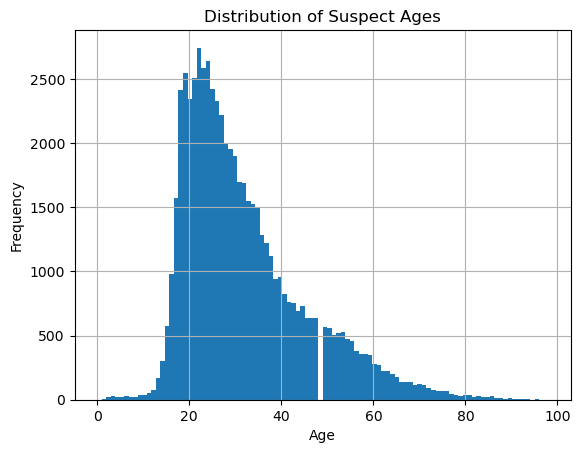

Age Group Cut-offs: [0, 12, 20, 44, 64, 100]


In [5]:
# plot distribution 
df['Subject-Suspect_age'].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Suspect Ages')
plt.show()

# Define yourcustom bins based on distribution
custom_bins = [0,12,20,44,64,100]

# Create age groups based on custom bins
data['Age_Group_Code'] = pd.cut(data['Subject-Suspect_age'], bins=custom_bins, labels=False, right=False)

# Print the cut-offs for the age groups
print("Age Group Cut-offs:", custom_bins)

The decision to group suspect ages into specific bins was driven by the need to simplify the analysis and enhance the interpretability of our model. By examining the histogram of suspect ages, it became evident that the distribution of ages was not uniform, warranting a categorization approach. The custom age bins [0-12, 12-20, 20-44, 44-64, 64-100] were chosen based on logical age groupings that reflect distinct life stages, which are likely to have different behavioral patterns and motivations. This categorization facilitates a more focused analysis and can help in identifying specific age groups that are more prominently represented in gun violence incidents, thereby informing targeted intervention strategies.  
- **Children (0-12 years):** This category includes individuals from infancy to pre-adolescence. In the context of gun violence incidents, this age group is typically considered as victims rather than perpetrators.  
  
- **Teenagers (13-20 years):** This group encompasses individuals in their teenage years. It's a critical stage where early signs of deviant behavior might emerge, and understanding patterns here can be key to early intervention strategies.  

- **Young Adults (21-44 years):** This age bracket includes individuals who are in the prime of their adult life. It's a diverse group where the majority of gun violence perpetrators fall, making it a focal point for detailed analysis and preventive measures.  

- **Middle-Aged Adults (45-64 years):** This category includes individuals who are in the middle age range. Their involvement in gun violence incidents may differ significantly in motives and patterns compared to younger groups.  

- **Senior Adults (65 years and above):** This group includes older adults, where involvement in gun violence incidents is relatively rare but still significant to study for a comprehensive understanding of the issue.  

Before we begin exploring, we have to clean our data enough to realistically tackle this problem. This means we have to remove the columns that provide information that would not be feasible to have if the suspect was unknown. For example, the columns depicting the relationship among the suspect and victim, as well as the columns describing the gun. This is all informartion that would not be known. 

In [6]:
columns_to_remove = ["Unnamed: 0","incident_id","date","gun_stolen","gun_type","participant_status",
                     "location_description","notes","participant_age", "participant_gender", 
                     "participant_name","participant_relationship","latitude","longitude",
                     "n_guns_involved","incident_characteristics", "state_senate_district", 
                     "Subject-Suspect_age","Subject-Suspect_gender","arrested_count", 
                     "participant_type","participant_age_group"]
missing_impute_df = data.copy()
data = data.drop(columns=columns_to_remove)


In [7]:
data.head()

,state,city_or_county,n_killed,n_injured,congressional_district,state_house_district,Victim_average_age,Age_Group_in_10s,Subject-Suspect_gender_binary,year,month,Age_Group_Code
0,New York,Queens,1,0,5.0,33.0,22.0,20-30,1,2014,1,2
1,Georgia,Columbus,0,1,2.0,135.0,27.0,20-30,1,2014,1,2
2,Georgia,Bibb County,0,1,2.0,142.0,24.0,30-40,1,2014,1,2
3,Virginia,Prince William County,0,1,1.0,50.0,31.0,20-30,1,2014,1,2
4,Virginia,Hampton,0,0,3.0,92.0,19.0,10-20,1,2014,1,1


The dataset provides a lot of information regarding location. We had originally decided to use congressional district, but we are open to trying other measures if that proves to be unhelpful. Now let's look at the data types:

In [8]:
print(f"Our data contains {len(data):,} samples.")

print("DATA INFORMATION:\n")
data.info()

Our data contains 61,661 samples.
DATA INFORMATION:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61661 entries, 0 to 61660
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          61661 non-null  object 
 1   city_or_county                 61661 non-null  object 
 2   n_killed                       61661 non-null  int64  
 3   n_injured                      61661 non-null  int64  
 4   congressional_district         61661 non-null  float64
 5   state_house_district           54165 non-null  float64
 6   Victim_average_age             21778 non-null  float64
 7   Age_Group_in_10s               61661 non-null  object 
 8   Subject-Suspect_gender_binary  61661 non-null  int64  
 9   year                           61661 non-null  int64  
 10  month                          61661 non-null  int64  
 11  Age_Group_Code                 61661 non-null  int64 

The data set contains some variables that we need to convert to categorical to ensure that an order isn't applied to them:

In [9]:
data['congressional_district'] = data['congressional_district'].astype('category')
data['state_house_district	'] = data['state_house_district'].astype('category')

Now, let's get familiar with incidents and how they relate to the variables in our dataset:

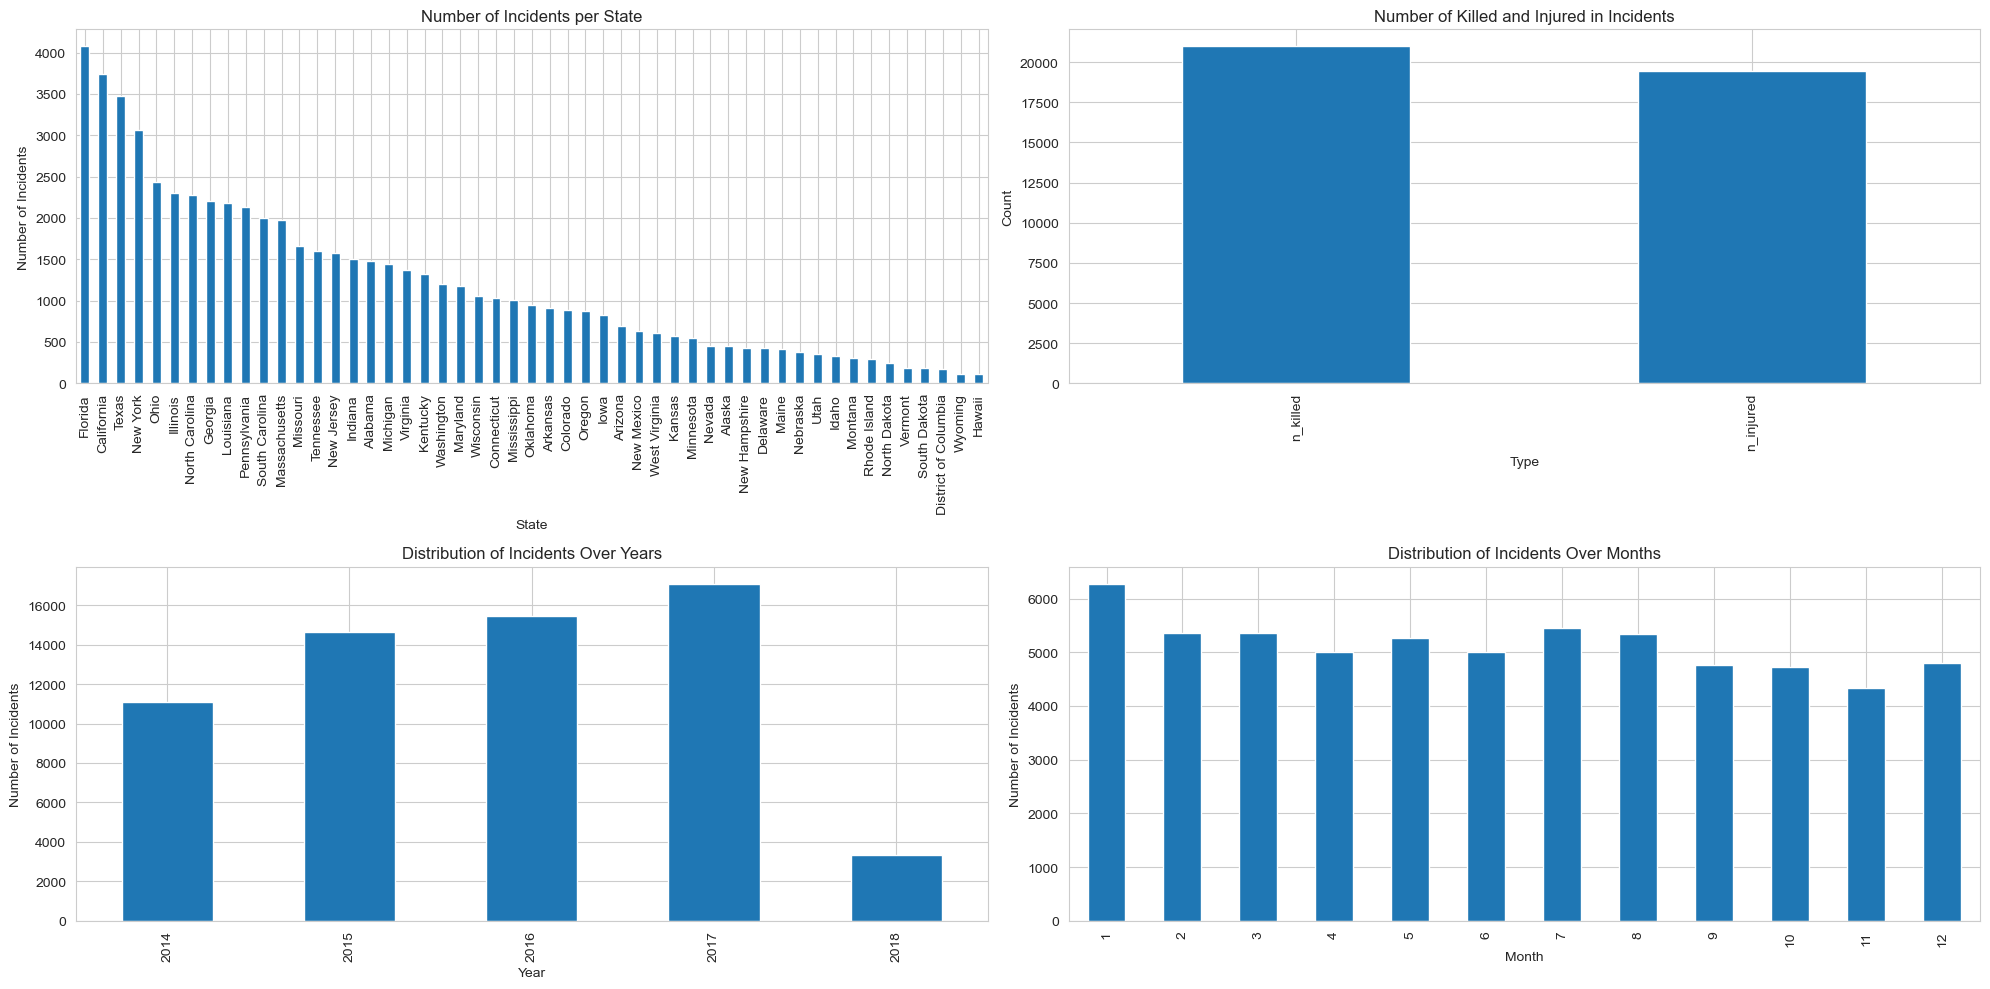

In [10]:
sns.set_style("whitegrid")

# 1. Number of incidents per state
state_counts = data['state'].value_counts()

# 2. Number of killed and injured in incidents
n_killed_injured = data[['n_killed', 'n_injured']].sum()

# 3. Distribution of incidents over the years
year_counts = data['year'].value_counts().sort_index()

# 4. Distribution of incidents over months
month_counts = data['month'].value_counts().sort_index()

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
state_counts.plot(kind='bar')
plt.title('Number of Incidents per State')
plt.xlabel('State')
plt.ylabel('Number of Incidents')

plt.subplot(2, 2, 2)
n_killed_injured.plot(kind='bar')
plt.title('Number of Killed and Injured in Incidents')
plt.xlabel('Type')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
year_counts.plot(kind='bar')
plt.title('Distribution of Incidents Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

plt.subplot(2, 2, 4)
month_counts.plot(kind='bar')
plt.title('Distribution of Incidents Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')

plt.tight_layout()
plt.show()

From the first graph on the left, we see that incidents vary drastically by state, with Florida having the highest number of incidents. This is something to potentially keep in mind when implementing the model. In the first graph on the right, we observe that our two numerical variables are relatively balanced.  

In the Incidents vs. Year graph on the bottom right, we notice a general trend towards increasing gun accidents (note that 2018 only contains three months and is thus truncated). From the last graph, we observe that the distribution of incidents over the twelve months is relatively evenly spread.

Subject-Suspect_gender_binary   -0.055648
n_injured                       -0.026356
state_house_district            -0.013630
year                            -0.006193
month                           -0.002231
n_killed                         0.100566
Victim_average_age               0.321509
Age_Group_in_10s_encoded         1.000000
Name: Age_Group_in_10s_encoded, dtype: float64


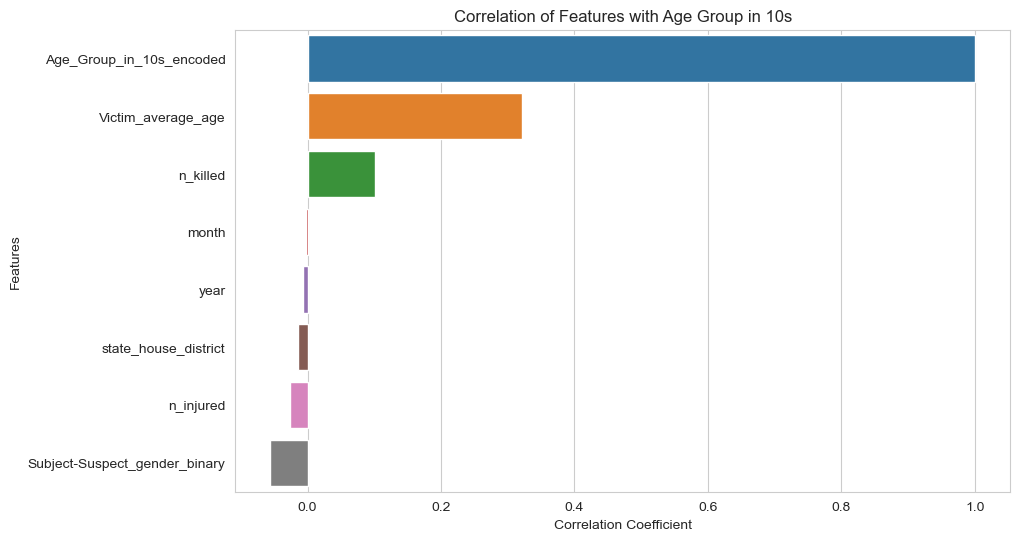

In [11]:
data_copy = data.copy()

age_group_mapping = {group: i for i, group in enumerate(data_copy['Age_Group_in_10s'].unique())}
data_copy['Age_Group_in_10s_encoded'] = data_copy['Age_Group_in_10s'].map(age_group_mapping)

numeric_df = data_copy.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop('Age_Group_Code', axis=1)
correlation_with_age_group = numeric_df.corr()['Age_Group_in_10s_encoded'].sort_values()

# Displaying the updated correlation coefficients
print(correlation_with_age_group)

# Adjusting the DataFrame for better visualization of the correlation coefficients
correlation_df = pd.DataFrame(correlation_with_age_group).reset_index()
correlation_df.columns = ['Feature', 'Correlation with Age Group in 10s']
correlation_df = correlation_df.dropna().sort_values(by='Correlation with Age Group in 10s', ascending=False)

# Plotting the improved correlation plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation with Age Group in 10s', y='Feature', data=correlation_df)
plt.title('Correlation of Features with Age Group in 10s')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

The examination of feature correlation with the target variable reveals that the 'Victim_Average_Age' exhibits the highest correlation, indicating its heightened significance in predicting the target outcome. This implies a notable association, suggesting that incidents with elevated victim ages tend to involve older suspects. A similar, albeit less pronounced, correlation is observed for the number of people killed. Additionally, the analysis indicates a positive correlation between the suspect being female and an increased age of the suspect, further contributing to the nuanced understanding of the dataset.

Now we can explore the class imbalance for each of the features.

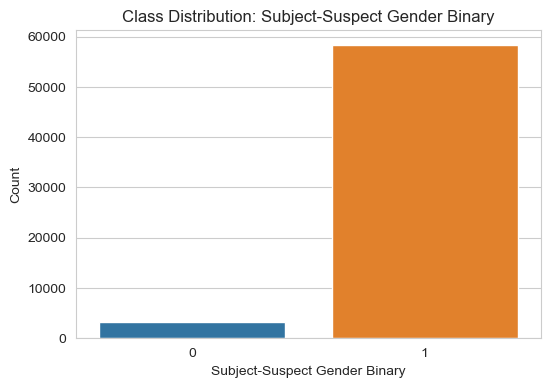

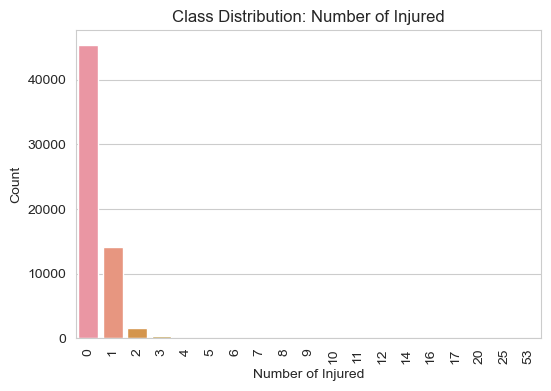

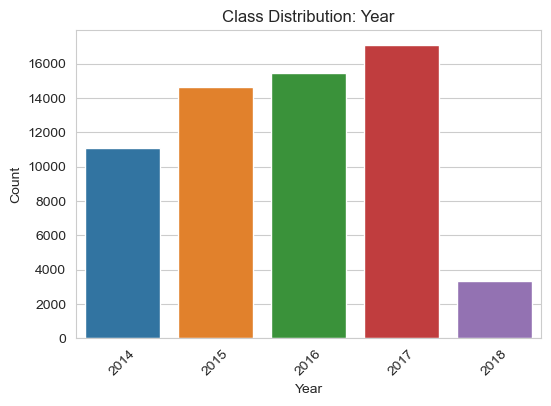

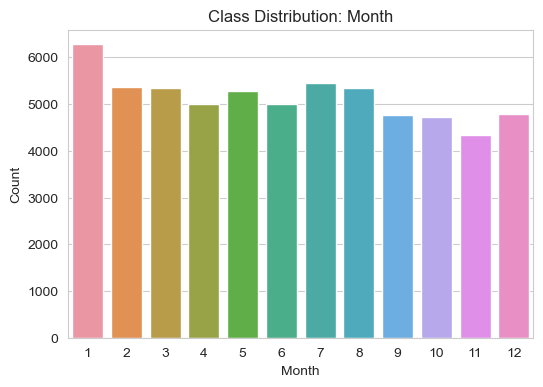

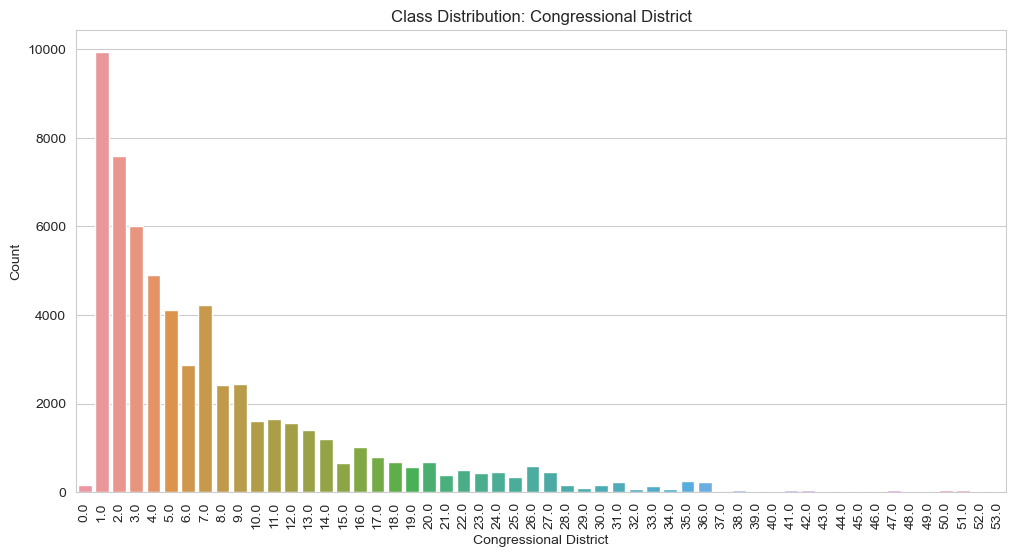

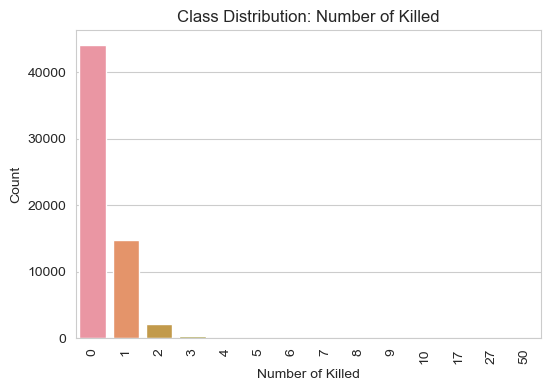

In [12]:
# Feature 1: Subject-Suspect_gender_binary
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Subject-Suspect_gender_binary')
plt.title('Class Distribution: Subject-Suspect Gender Binary')
plt.xlabel('Subject-Suspect Gender Binary')
plt.ylabel('Count')
plt.show()

# Feature 2: n_injured
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='n_injured')
plt.title('Class Distribution: Number of Injured')
plt.xlabel('Number of Injured')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Feature 4: year
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='year')
plt.title('Class Distribution: Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Feature 5: month
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='month')
plt.title('Class Distribution: Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Feature 6: congressional_district
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='congressional_district')
plt.title('Class Distribution: Congressional District')
plt.xlabel('Congressional District')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Feature 7: n_killed
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='n_killed')
plt.title('Class Distribution: Number of Killed')
plt.xlabel('Number of Killed')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Evidently, a substantial data imbalance exists among genders, prompting our decision to exclusively predict suspect age rather than both age and gender. This choice was driven by the recognition that the inherent data imbalance would pose considerable challenges. Notably, in the context of both the number of injured and the number killed, the data distribution is skewed toward values of 0 or 1, aligning with the inherent characteristics of gun violence incidents. While this distribution should not unduly impact our analyses, it necessitates a vigilant consideration of potential outliers. The remaining variables exhibit a balanced distribution.

Now, to prepare our data for model implementation. we need to convert the following categorical variables: 'Age_Group_in_10s', 'state', and 'city_or_county'.

<a id="part2"></a>
# Model Implementation

<a id="part2-preparation"></a>
## Data Preparation

<a id="part2-missing"></a>
### Addressing Missingness in the Dataset

Before we begin our model implementation, it's essential to address the missing data issues highlighted during our Exploratory Data Analysis (EDA). We expect to sue classification methods that cannno thandle mising data (such as random forests, and so we will remove state_house_diostrict, since we already have a variable that takes into account congressional district. 

In [13]:
print("DATA INFORMATION:\n")
data.info()

DATA INFORMATION:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61661 entries, 0 to 61660
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          61661 non-null  object  
 1   city_or_county                 61661 non-null  object  
 2   n_killed                       61661 non-null  int64   
 3   n_injured                      61661 non-null  int64   
 4   congressional_district         61661 non-null  category
 5   state_house_district           54165 non-null  float64 
 6   Victim_average_age             21778 non-null  float64 
 7   Age_Group_in_10s               61661 non-null  object  
 8   Subject-Suspect_gender_binary  61661 non-null  int64   
 9   year                           61661 non-null  int64   
 10  month                          61661 non-null  int64   
 11  Age_Group_Code                 61661 non-null  int64   
 12  state_house_d

In [14]:
df = data.copy()
df.columns = df.columns.str.strip()
columns_to_drop = ['state_house_district']
df = df.drop(columns=columns_to_drop)

A particular point of concern is the significant amount of missing entries for the Victim_average_age variable. As a pivotal factor for training our predictive model, the nature of this missingness warrants a thorough investigation. We need to discern whether the absence of data arises from it being Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR). Understanding the underlying patterns of these missing values is crucial for informed data imputation. Therefore, we will begin by exporting the Victim_average_age data to a CSV file, allowing us to conduct an in-depth visual assessment and identify potential patterns or correlations associated with its missingness.

In [15]:
# Filter rows where 'Victim_average_age' is missing
missing_age_df = df[df['Victim_average_age'].isnull()]

# Save these rows to a new CSV file
missing_age_df.to_csv('missing_victim_age.csv', index=False)

Upon reviewing the CSV file, we noticed that a considerable number of entries under the 'comments' section pertain to possession charges. While these incidents are recorded within the context of gun violence, they do not involve a victim and are solely related to possession offenses. Given that our model's objective is to predict the perpetrator in violent gun incidents, entries relating to mere possession charges introduce noise into our dataset and should be excluded. A preliminary method to identify possession charges could involve verifying whether both n_injured and n_killed fields equal zero, as this strongly suggests a non-violent possession charge without any victims.

In [16]:
filtered_rows = df[df['Victim_average_age'].isnull() & (df['n_injured'] == 0) & (df['n_killed'] == 0)]

# Count these rows
count_filtered_rows = filtered_rows.shape[0]

# These are possession charges, or cases where there are no victims. Therefore they are not needed for our model 
print("Number of rows with no injuries or deaths and missing Victim_average_age:", count_filtered_rows)

Number of rows with no injuries or deaths and missing Victim_average_age: 29091


Upon analysis, it's been noted that Victim_average_age is missing in exactly 29,091 instances where both n_injured and n_killed are zero. This leaves us with 10,792 data points (from the original 39,883) that involve victims but lack recorded victim ages.

Further examination reveals that in many of these incidents, shots were fired but did not result in injuries or fatalities. Thus, while there were no casualties, a victim was indeed present. Although participant_age was not recorded for these victims, we do have access to participant_age_group data in some cases. This classification indicates whether the victim is a child, teen, or adult. While not as precise as an exact age, this categorical information can significantly improve our imputation strategy by providing a more accurate mean age estimate for missing values.

In [17]:
# Calculate the mean age for the 'child', 'teen', and 'adult' categories to perform mean imputation on `Victim_average_age`.
count = 0
stage_3 = pd.read_csv("stage3.csv")
helper.extract_victim_average_age_groups(stage_3)

Average ages for the groups 0-12, 12-18, 18+ are: [6.462905500705219, 16.471141484538872, 32.904180461253574]


With the average ages determined for each category, we will impute missing `Victim_average_age` values accordingly. In cases with multiple victims, we will calculate and apply the mean of these averages.

In [18]:
age_group_averages = [6.462905500705219, 16.471141484538872, 32.904180461253574]
mean_imput_df = missing_impute_df.copy()
# Impute the victim age for the victime we have some information about (participate age_group) 
updated_df = helper.update_victim_average_age(mean_imput_df, age_group_averages)

# Don't need anymore
updated_df = updated_df.drop(columns=columns_to_remove)

In [19]:
missing_values_count = updated_df['Victim_average_age'].isna().sum()
print(f"Number of missing values in 'Victim_average_age': {missing_values_count}")

Number of missing values in 'Victim_average_age': 30260


We have successfully imputed 9,622 missing values using the mean age of the respective victim's age group. This approach not only retains valuable data but also enhances our dataset size significantly, from the original 21778 data points with the removing missing rows method to an augmented set of 31,401.

In [20]:
# Removing rows where 'Victim_average_age' is missing, thereby purifying the dataset.
df_mean_drop = updated_df.dropna(subset=['Victim_average_age'])

# Imputing missing values and adding an indicator variable for missing 'Victim_average_age'.
df_mean_indicator = updated_df.copy()
df_mean_indicator['Victim_average_age_missing'] = df_mean_indicator['Victim_average_age'].isnull().astype(int)

# Creating a version of the dataset with all rows missing 'Victim_average_age' removed.
all_drop = data.copy()
all_drop = all_drop.dropna(subset=['Victim_average_age'])

In [21]:
[len(all_drop),len(df_mean_indicator),len(df_mean_drop),len(data)]

[21778, 61661, 31401, 61661]

In [22]:
data = df_mean_drop.copy()

Now, to prepare our data for model implementation. we need to convert the following categorical variables: 'Age_Group_in_10s', 'state', and 'city_or_county'.

In [23]:
# Perform one-hot encoding for the 'state' column
df_encoded = pd.get_dummies(data, columns=['state'])

# Calculate the frequency of each city or county
city_freq = df_encoded['city_or_county'].value_counts().to_dict()

# Map frequencies to the 'city_or_county' column
df_encoded['city_or_county_freq'] = df_encoded['city_or_county'].map(city_freq)

# drop columns but recognize city later
columns_to_drop = ["city_or_county", "Age_Group_in_10s","state_house_district"]
df = df_encoded.drop(columns=columns_to_drop)

# rename gender column
df.rename(columns={'Subject-Suspect_gender_binary': 'gender'})

,n_killed,n_injured,congressional_district,Victim_average_age,gender,year,month,Age_Group_Code,state_Alabama,state_Alaska,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,city_or_county_freq
0,1,0,5.0,22.00000,1,2014,1,2,False,False,...,False,False,False,False,False,False,False,False,False,24
1,0,1,2.0,27.00000,1,2014,1,2,False,False,...,False,False,False,False,False,False,False,False,False,298
2,0,1,2.0,24.00000,1,2014,1,2,False,False,...,False,False,False,False,False,False,False,False,False,5
3,0,1,1.0,31.00000,1,2014,1,2,False,False,...,False,False,False,False,True,False,False,False,False,1
4,0,0,3.0,19.00000,1,2014,1,1,False,False,...,False,False,False,False,True,False,False,False,False,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61652,2,0,12.0,57.50000,1,2018,3,3,False,False,...,False,False,False,False,False,False,False,False,False,1
61656,0,1,8.0,63.00000,1,2018,3,2,False,False,...,False,False,False,False,False,False,False,False,False,2
61657,0,1,9.0,69.00000,0,2018,3,2,False,False,...,True,False,False,False,False,False,False,False,False,226
61659,1,0,4.0,32.90418,1,2018,3,2,False,False,...,False,False,False,False,False,False,False,False,False,8


<a id="part2-overview"></a>
### Data Overview

In [24]:
print(f"Our data contains {len(df):,} samples.")

print("\n DATA HEAD:")
display(df.head())

Our data contains 31,401 samples.

 DATA HEAD:


,n_killed,n_injured,congressional_district,Victim_average_age,Subject-Suspect_gender_binary,year,month,Age_Group_Code,state_Alabama,state_Alaska,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,city_or_county_freq
0,1,0,5.0,22.0,1,2014,1,2,False,False,...,False,False,False,False,False,False,False,False,False,24
1,0,1,2.0,27.0,1,2014,1,2,False,False,...,False,False,False,False,False,False,False,False,False,298
2,0,1,2.0,24.0,1,2014,1,2,False,False,...,False,False,False,False,False,False,False,False,False,5
3,0,1,1.0,31.0,1,2014,1,2,False,False,...,False,False,False,False,True,False,False,False,False,1
4,0,0,3.0,19.0,1,2014,1,1,False,False,...,False,False,False,False,True,False,False,False,False,48


Now we can split our train and test data.

In [25]:
X = df.drop('Age_Group_Code', axis=1)  # Features
y = df['Age_Group_Code']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)
X_train_copy, X_test_copy, y_train_copy, y_test_copy = X_train, X_test, y_train, y_test

<a id="part2.1"></a>
## Decision Tree

Let's begin by fitting a simple decision tree for age:

In [26]:
tree_depths = list(range(1, 21))
train_scores = []
cvmeans = []
cvstds = []

# Loop over each tree depth
for depth in tree_depths:

    # Fit a decision tree and evaluate on the entire training set
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    train_scores.append(train_score)

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    cvmeans.append(np.mean(cv_scores))
    cvstds.append(np.std(cv_scores))

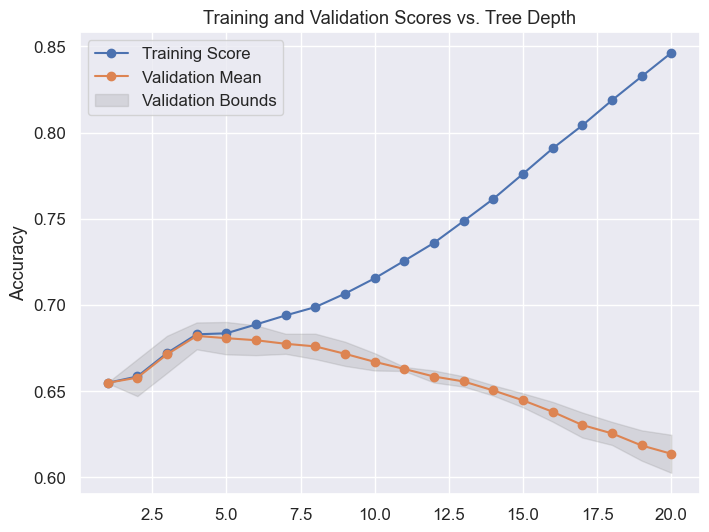

In [38]:
# Plot for both training and validation scores
fig, ax = plt.subplots(figsize=(8, 6))

# Plot non-cross-validation training scores
ax.plot(tree_depths, train_scores, label='Training Score', marker='o')

# Plot mean validation scores and shaded region for +/-2 standard deviation bounds
ax.plot(tree_depths, cvmeans, label='Validation Mean', marker='o')
ax.fill_between(tree_depths, np.array(cvmeans) - 2 * np.array(cvstds),
                np.array(cvmeans) + 2 * np.array(cvstds), color='gray', alpha=0.2, label='Validation Bounds')

# Label
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Scores vs. Tree Depth')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


In [28]:
# choose best depth after a qualitative assessment of our plots
best_cv_index = np.argmax(cvmeans)
best_cv_depth = tree_depths[best_cv_index]

best_cv_tree = DecisionTreeClassifier(max_depth=best_cv_depth, random_state=0)
best_cv_tree.fit(X_train, y_train)

best_cv_tree_train_score = best_cv_tree.score(X_train, y_train)
best_cv_tree_test_score = best_cv_tree.score(X_test, y_test)

print(
    "The tree of max-depth {} trained on the "
    "full training set, achieves the following accuracy scores:"
    "\n\n\ttrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        best_cv_depth,
        best_cv_tree_train_score,
        best_cv_tree_test_score,
    )
)

The tree of max-depth 4 trained on the full training set, achieves the following accuracy scores:

	train	0.6829
	TEST	0.6660


We see that our accuracy is not very high. We have yet to implement bagging or RandomForest (which we believe will be the most accurate). Let's explore why: 

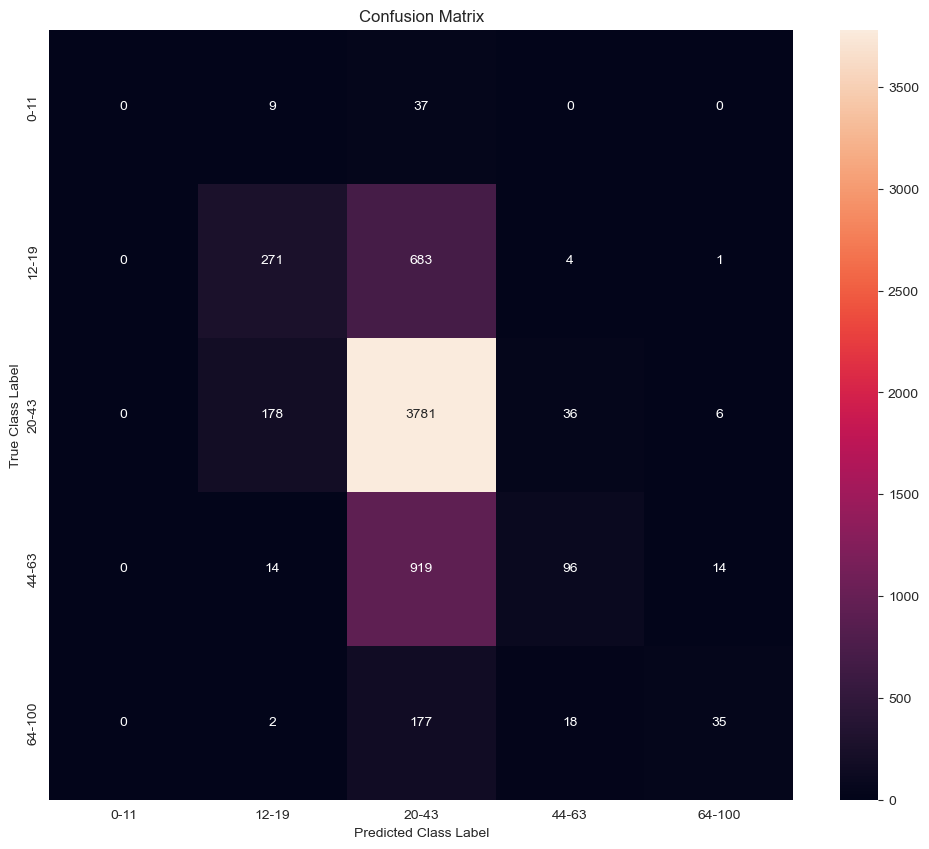

In [29]:
y_pred = best_cv_tree.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# List of age group labels from the 'Age_Group_in_10s' column
age_group_labels = ['0-11','12-19','20-43','44-63','64-100']

# Plotting the confusion matrix with actual class labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='g',
            xticklabels=age_group_labels, yticklabels=age_group_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Class Label')
plt.xlabel('Predicted Class Label')
plt.show()

In the confusion matrix, we see that the numbers are particularly high in the pedicted class column for '20-43', which indicates that the model has a strong tendency to predict many instances as belonging to the '20-43' age group regardless of their true class. Adjacent age groups such as '12-19' and '44-63' are often predicted to be in age group '20-43'. Ideally, the diagonal should have higher values, as they indicate high TP and TN predictions. We will try improving our accuracy score with Bagging and Random Forest, which are supposed to be effective in this case due to their ensemble nature and ability to handle complex relationships in the data. The observed issue in the confusion matrix, where many instances are incorrectly predicted as belonging to the '20-43' age group regardless of their true class, suggests that the Decision Tree model might be overfitting or oversimplifying the data.

<a id="part2.2"></a>
## Bagging

In [30]:
n_trees = 50
tree_depth = 5
bagging_train_df, bagging_test_df, bagging_models_list = helper.bagger(n_trees = n_trees,
                                                                tree_depth = tree_depth,
                                                                X_train = X_train,
                                                                y_train = y_train,
                                                                X_test = X_test,
                                                                random_seed = 0)

In [31]:
bagging_train_predictions = np.mean(bagging_train_df.values, axis=1)
bagging_test_predictions = np.mean(bagging_test_df.values, axis=1)

# Calculate bagging accuracies
bagging_accuracy_train = np.mean(bagging_train_predictions == y_train)
bagging_accuracy_test = np.mean(bagging_test_predictions == y_test)

print(
    f"Bagging {n_trees} trees of depth-{tree_depth} achieves "
    f"the following accuracy scores:\n\n\ttrain\t"
    f"{bagging_accuracy_train:.4f}\n\tTEST\t"
    f"{bagging_accuracy_test:.4f}\n"
)
print(
    f"Our prior single depth-5 tree achieved a "
    f"TEST score of {best_cv_tree_test_score:.4f}."
)

Bagging 50 trees of depth-5 achieves the following accuracy scores:

	train	0.6021
	TEST	0.5856

Our prior single depth-5 tree achieved a TEST score of 0.6660.


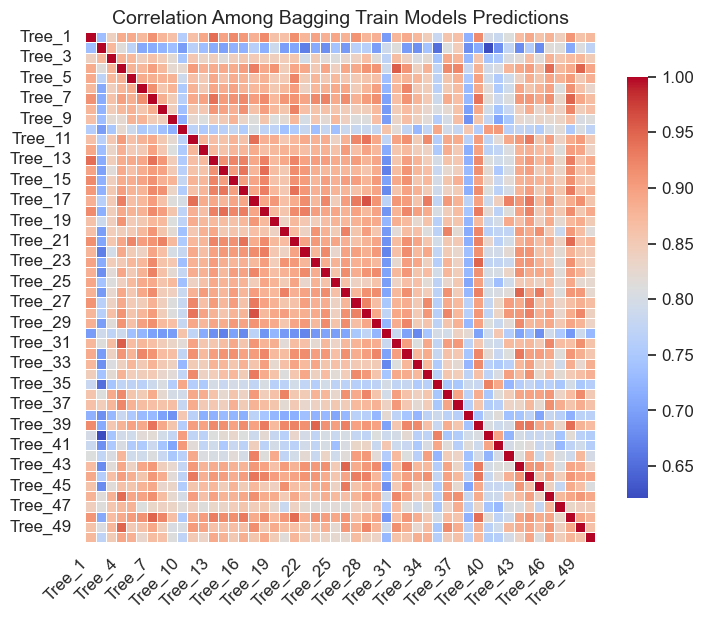

In [32]:
# Extract predictions from each base model
bagging_train_predictions_list = [bagging_train_df[col] for col in bagging_train_df.columns]
bagging_test_predictions_list = [bagging_test_df[col] for col in bagging_test_df.columns]

# Create DataFrames for individual base model predictions
bagging_train_predictions_df = pd.DataFrame({f'Tree_{i+1}': predictions for i, predictions in enumerate(bagging_train_predictions_list)})
bagging_test_predictions_df = pd.DataFrame({f'Tree_{i+1}': predictions for i, predictions in enumerate(bagging_test_predictions_list)})

# Calculate the correlation matrices
correlation_matrix_train = bagging_train_predictions_df.corr()
correlation_matrix_test = bagging_test_predictions_df.corr()

plt.figure(figsize=(14, 6))
sns.set(font_scale=1.1)  

plt.subplot(1, 2, 1)
sns.heatmap(
    correlation_matrix_train,
    annot=False,
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title('Correlation Among Bagging Train Models Predictions', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0) 
plt.tight_layout()

plt.show()

The bagging approach yielded a lower accuracy scores for both the training and test datasets, a surprising outcome upon initial assessment. Closer examination of the dataset through a correlation map demonstates increased correlation among the bootstrapped decision trees. The susceptibility of bagging to poor performance is notable in scenarios where the base models (trees) exhibit high correlation, as is evident in our dataset and shown on the correlation map above. Given the intricate interactions and high dimensionality of our dataset, the introduction of randomness in the random forest approach may be better aligned with its inherent complexities.

<a id="part2.3"></a>
## Random Forest

Now we will attempt to imporve our test score by uitlizing a Random Forest.

In [33]:
# Finally, we can use RandomForest
random_forest_classifier = RandomForestClassifier(
    n_estimators = n_trees,
    max_depth = tree_depth,
    max_features = 'sqrt',  # Square root of the total number of features
    random_state = 109
)
random_forest_classifier.fit(X_train, y_train)

random_forest_train_score = random_forest_classifier.score(X_train, y_train)
random_forest_test_score = random_forest_classifier.score(X_test, y_test)

print(f"Random Forest Train Accuracy: {random_forest_train_score:.4f}")
print(f"Random Forest Test Accuracy: {random_forest_test_score:.4f}")

Random Forest Train Accuracy: 0.6548
Random Forest Test Accuracy: 0.6370


Reducing our dataset from 61,000 to 19,000 instances resulted in lower accuracy scores, highlighting the impact of dataset size on predictive performance. Surprisingly, even with the ensemble approach of Random Forest, we didn't observe the expected improvement in accuracy. This discrepancy emphasizes the challenges introduced by the reduced dataset size and raises questions about the adaptability of ensemble methods to such scenarios. Further investigation into factors like hyperparameter tuning is warranted to explore avenues for enhancing predictive accuracy in the context of significantly reduced data size. Reducing the dataset increases its simplicity.

### Correlation of data
We initially assumed that the trees were correlated, but the results of the RandomForest asks us to revisit the features and the importance they hold in determining the age group.

In [34]:
combined_data = pd.concat([X_train_copy, y_train_copy], axis=1)
correlation_values = combined_data.corrwith(y_train_copy)
top_5 = correlation_values.abs().nlargest(5)
display(top_5)

Age_Group_Code                   1.000000
Victim_average_age               0.402771
n_killed                         0.120714
city_or_county_freq              0.112925
Subject-Suspect_gender_binary    0.070504
dtype: float64

Upon reviewing the outcomes presented, which we briefly explored during EDA, it becomes evident that the column "Victim_average_age," previously excluded, exhibits notably high feature importance and would thus obviously harm the predictive model if removed. However, the utilization of RandomForest is constrained by its requirement of a dataset devoid of NaN values. In light of this constraint, RandomForest proves unsuitable for our specific objective. While contemplating the prospect of imputing missing values, the sheer volume of rows with absent "Victim_average_age" entries raises concerns about potential data imbalances that such imputation might introduce.

<a id="part2final"></a>
## Final Model

For the final model pipeline, we have decided to use the Decision Tree as the final model. This decision is based on several key observations and considerations regarding the dataset and our project's goal. Firstly, the Decision Tree model achieved a higher score compared to more complex ensemble methods like Bagging and Random Forest. While this outcome was unexpected, it suggests that our dataset was relatively straightforward, with crucial patterns that can be effectively captured with simple decision splits.

Furthermore, the dataset seems to contain a few highly predictive features, which a Decision Tree can utilize efficiently. In contrast, the random feature selection in ensemble methods might overlook these key features in some models. Moreover, the dataset contained many missing values, which meant that rows with missing values had to be removed for Random Forest, significantly reducing the dataset's size. The inherent capability of Decision Trees to manage missing data effectively was particularly beneficial.

For our final submission, we will optimize the decision tree to better optimize the dataset and output.